In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
from time import time

import tensorflow as tf
from tensorflow import keras

from useful_functions import load_transform_split, color_scatter, scatter_predvreal, get_metric, plot_performance
from RandomSeedSearchCV import RandomSeedSearchCV, randomseed_ann_maker

from joblib import dump,load

In [2]:
X_train,X_test,y_train,y_test,pipeline = load_transform_split(target='DROPOUT_N',
                                                              expand=False,
                                                              clean=True,
                                                              split=0.2,
                                                              return_pipeline=True,
                                                              fmt='numpy',
                                                              random_state=42)

#y_train = y_train.flatten()
#y_test  = y_test.flatten()

Train on 51890 samples
51890/51890 [==============================] - 16s 301us/sample - loss: 3.5342
Train on 51890 samples
51890/51890 [==============================] - 10s 199us/sample - loss: 5.5379
Train on 51890 samples
51890/51890 [==============================] - 10s 185us/sample - loss: 3.0693
Train on 51890 samples
51890/51890 [==============================] - 10s 185us/sample - loss: 4.6350
Train on 51890 samples
51890/51890 [==============================] - 8s 148us/sample - loss: 3.0619
Train on 51890 samples
51890/51890 [==============================] - 8s 147us/sample - loss: 4.2155
Train on 51890 samples
51890/51890 [==============================] - 8s 145us/sample - loss: 2.9033
Train on 51890 samples
51890/51890 [==============================] - 13s 248us/sample - loss: 5.5379
Train on 51890 samples
51890/51890 [==============================] - 9s 171us/sample - loss: 5.5379
Train on 51890 samples
51890/51890 [==============================] - 7s 144us/sample 

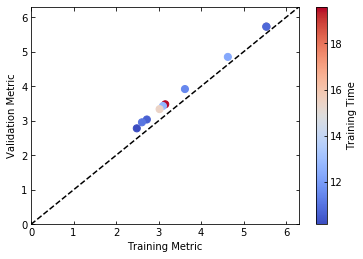

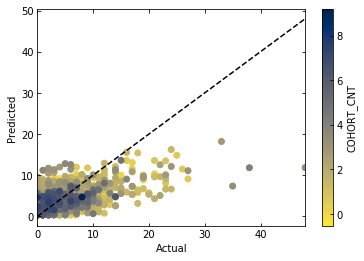

In [8]:
#CAUTION: This cell takes awhile unless you make N small.

optimizer = keras.optimizers.Adam()
#Searching through neural net models.
tbl = RandomSeedSearchCV(randomseed_ann_maker,X_train,y_train,N=12,cv=1,
                         input_shape=[X_train.shape[1]],
                         output_shape=1,output_activation='relu',
                         loss='mean_squared_error',optimizer=optimizer)
print(tbl)

#Get best model.
best_seed = int(tbl[0,0])
best_model = randomseed_ann_maker(best_seed,input_shape=[X_train.shape[1]],
                                  output_shape=1,output_activation='relu',
                                  loss='mean_squared_error',optimizer=optimizer)

#Plot goodness-of-fit
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
scatter_predvreal(y_test,y_pred,colorby=X_test[:,0])

In [4]:
mse = get_metric('mean_squared_error')

print("Best RFR: Train RMSE = %.2f, Test RMSE = %.2f"%(
                               np.sqrt(mse(best_model,X_train,y_train)),
                               np.sqrt(mse(best_model,X_test,y_test)),
                               ))

Best RFR: Train RMSE = 1.40, Test RMSE = 1.48


In [11]:
#Store random search output and pickle best model.
np.savetxt("trial1_ANN_randomseedsearch.out",tbl,header='seed  training_mse  validation_mse  training_time(s)')
best_model.save('saved_models/trial1_best_ann_DROPOUT_N.h5') 

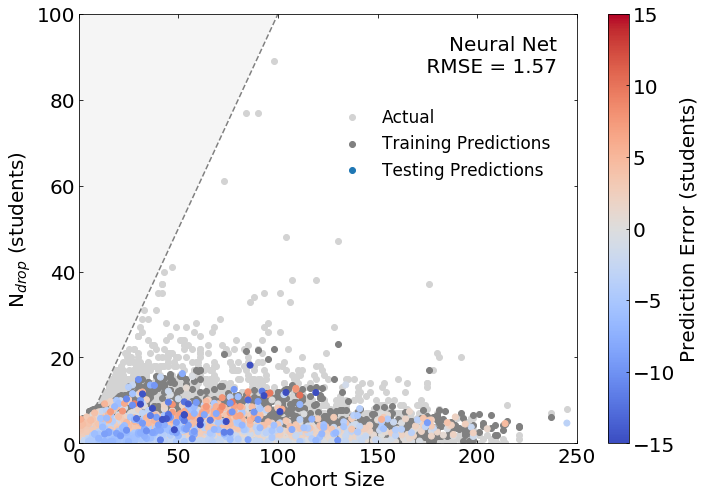

In [12]:
#Make a pretty plot
plt.rcParams.update({
                     'xtick.direction':'in',
                     'xtick.top':True,
                     'xtick.bottom':True,
                     'ytick.direction':'in',
                     'ytick.right':True,
                     'ytick.left':True,
})

#rfr = load('saved_models/best_RandomForestRegressor_DROPOUT_N.joblib')
ann = best_model
ax = plot_performance(ann,'Neural Net',X_train,X_test,y_train,y_test)

plt.tight_layout()
ax.figure.savefig('figures/trial1_best_ann_summary.png',dpi=450)

In [13]:
best_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_256 (Dense)            (None, 16)                320       
_________________________________________________________________
dense_257 (Dense)            (None, 2)                 34        
_________________________________________________________________
dense_258 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_259 (Dense)            (None, 16)                80        
_________________________________________________________________
dense_260 (Dense)            (None, 1)                 17        
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________
